In [20]:
from datadreamer import DataDreamer
from datadreamer.llms import OpenAI
from datadreamer.steps import DataFromPrompt, Embed, CosineSimilarity, concat
from datadreamer.embedders import SentenceTransformersEmbedder
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [6]:
os.environ["OPENAI_API_KEY"] = input("Enter OpenAI API Key")

In [52]:
with DataDreamer("./output"):
    gpt_4 = OpenAI(
        model_name="gpt-4",
        organization="org-bgAXfs8WdU5942SLngg0OGpd"
    )

    pos_data = DataFromPrompt(
        "Generate Data with Positive Style",
        args={
            "llm": gpt_4,
            "n": 100,
            "temperature": 1.2,
            "instruction": (
                "Generate a sentence where words with positive affect are frequently used. Respond with only the sentence."
            ),
        },
        outputs={"generations": "sentences"},
    )
    neg_data = DataFromPrompt(
        "Generate Data with Negative Style",
        args={
            "llm": gpt_4,
            "n": 100,
            "temperature": 1.2,
            "instruction": (
                "Generate a sentence where words with negative affect are frequently used. Respond with only the sentence."
            ),
        },
        outputs={"generations": "sentences"},
    )


[ 🤖 DataDreamer 💤 ] Initialized. 🚀 Dreaming to folder: ./output
[ 🤖 DataDreamer 💤 ] Step 'Generate Data with Positive Style' was previously run and saved, but was outdated. 😞


[ 🤖 DataDreamer 💤 ] Step 'Generate Data with Positive Style' is running. ⏳


In [42]:
with DataDreamer("./output"):
    pos_embed = Embed(
        name = "Positive Data Embeddings",
        inputs = {
            "texts": pos_data.output["sentences"]
        },
        args = {
            "embedder": SentenceTransformersEmbedder(
                model_name="AnnaWegmann/Style-Embedding"
            )
        },
        outputs = {
            "texts": "sentences",
            "embeddings": "embeddings"
        },
    )
    neg_embed = Embed(
        name = "Negative Data Embeddings",
        inputs = {
            "texts": neg_data.output["sentences"]
        },
        args = {
            "embedder": SentenceTransformersEmbedder(
                model_name="AnnaWegmann/Style-Embedding"
            )
        },
        outputs = {
            "texts": "sentences",
            "embeddings": "embeddings"
        },
    )
    '''
    cos_sim = CosineSimilarity(
		name = "Cosine Similarities",
		inputs = {
			"a": pos_data.output["sentences"],
			"b": neg_data.output["sentences"]
		},
		args = {
			"embedder": SentenceTransformersEmbedder(
                model_name="AnnaWegmann/Style-Embedding"
            )
		},
		outputs = {
			"a": "pos_sentences",
			"b": "neg_sentences",
			"similarities": "cos_sim"
		},
	)
    '''

[ 🤖 DataDreamer 💤 ] Initialized. 🚀 Dreaming to folder: ./output
[ 🤖 DataDreamer 💤 ] Step 'Positive Data Embeddings' was previously run and saved, but was outdated. 😞
[ 🤖 DataDreamer 💤 ] Step 'Positive Data Embeddings' is running. ⏳
[ 🤖 DataDreamer 💤 ] Step 'Positive Data Embeddings' finished and is saved to disk. 🎉
[ 🤖 DataDreamer 💤 ] Step 'Negative Data Embeddings' was previously run and saved, but was outdated. 😞
[ 🤖 DataDreamer 💤 ] Step 'Negative Data Embeddings' is running. ⏳
[ 🤖 DataDreamer 💤 ] Step 'Negative Data Embeddings' finished and is saved to disk. 🎉
[ 🤖 DataDreamer 💤 ] Done. ✨ Results in folder: ./output


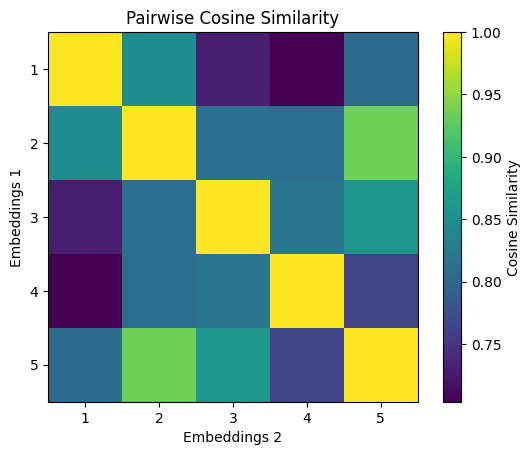

In [48]:
pos_embed_lst = [pos_embed.output["embeddings"][i] for i in range(pos_embed.output.num_rows)]
neg_embed_lst = [neg_embed.output["embeddings"][i] for i in range(neg_embed.output.num_rows)]
all_embed_lst = np.array(pos_embed_lst + neg_embed_lst)

embed_lst_1 = pos_embed_lst
embed_lst_2 = pos_embed_lst

cosine_similarities = cosine_similarity(embed_lst_1, embed_lst_2)
plt.imshow(cosine_similarities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Pairwise Cosine Similarity')
plt.xlabel('Embeddings 2')
plt.ylabel('Embeddings 1')
plt.xticks(ticks=np.arange(len(embed_lst_1)), labels=np.arange(1, len(embed_lst_1)+1))
plt.yticks(ticks=np.arange(len(embed_lst_2)), labels=np.arange(1, len(embed_lst_2)+1))
plt.show()
np.fill_diagonal(cosine_similarities, np.nan)
avg_cos_sim_both_pos = np.nanmean(cosine_similarities)

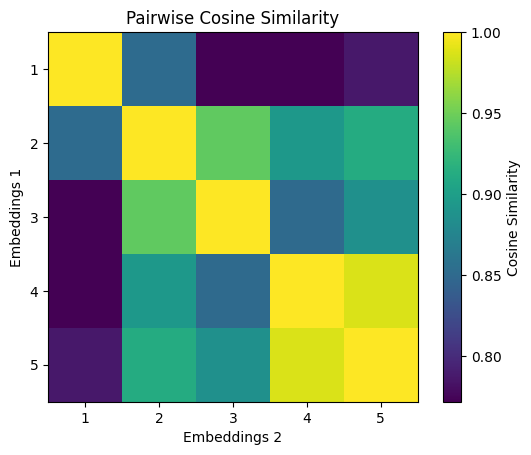

In [49]:
embed_lst_1 = neg_embed_lst
embed_lst_2 = neg_embed_lst

cosine_similarities = cosine_similarity(embed_lst_1, embed_lst_2)
plt.imshow(cosine_similarities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Pairwise Cosine Similarity')
plt.xlabel('Embeddings 2')
plt.ylabel('Embeddings 1')
plt.xticks(ticks=np.arange(len(embed_lst_1)), labels=np.arange(1, len(embed_lst_1)+1))
plt.yticks(ticks=np.arange(len(embed_lst_2)), labels=np.arange(1, len(embed_lst_2)+1))
plt.show()
np.fill_diagonal(cosine_similarities, np.nan)
avg_cos_sim_both_neg = np.nanmean(cosine_similarities)

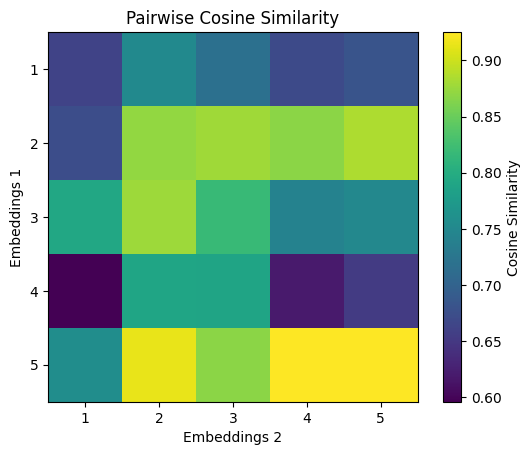

In [50]:
embed_lst_1 = pos_embed_lst
embed_lst_2 = neg_embed_lst

cosine_similarities = cosine_similarity(embed_lst_1, embed_lst_2)
plt.imshow(cosine_similarities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Pairwise Cosine Similarity')
plt.xlabel('Embeddings 2')
plt.ylabel('Embeddings 1')
plt.xticks(ticks=np.arange(len(embed_lst_1)), labels=np.arange(1, len(embed_lst_1)+1))
plt.yticks(ticks=np.arange(len(embed_lst_2)), labels=np.arange(1, len(embed_lst_2)+1))
plt.show()
np.fill_diagonal(cosine_similarities, np.nan)
avg_cos_sim_pos_neg = np.nanmean(cosine_similarities)

In [51]:
print(avg_cos_sim_both_pos)
print(avg_cos_sim_both_neg)
print(avg_cos_sim_pos_neg)

0.8090332043754174
0.8657063832931617
0.7790876504680095
